In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } </style>"))
import numpy as np
np.set_printoptions(linewidth=160)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [23]:
nx=5
ny=5
x=np.linspace(0,1,nx)
y=np.linspace(0,1,ny)
vx,vy=np.meshgrid(x,y)

In [31]:
dx=np.zeros((nx*ny,nx*ny))
dy=np.zeros((nx*ny,nx*ny))
for i in range(nx):
    for j in range(ny):
        if (i>0) and (i<(nx-1)):
#            dx[j*nx+i,j*nx+i-1]=-.5
#            dx[j*nx+i,j*nx+i+1]=.5
            dx[j*nx+i,j*nx+i-1]=-1
            dx[j*nx+i,j*nx+i]=1
        elif (i==0):
            dx[j*nx+i,j*nx+i]=-1.
            dx[j*nx+i,j*nx+i+1]=1.
        else:
            dx[j*nx+i,j*nx+i-1]=-1.
            dx[j*nx+i,j*nx+i]=1.
        if (j>0) and (j<(ny-1)):
#            dy[j*nx+i,(j-1)*nx+i]=-.5
#            dy[j*nx+i,(j+1)*nx+i]=.5
            dy[j*nx+i,(j-1)*nx+i]=-1
            dy[j*nx+i,(j)*nx+i]=1
        elif (j==0):
            dy[j*nx+i,(j)*nx+i]=-1.
            dy[j*nx+i,(j+1)*nx+i]=1.
        else:
            dy[j*nx+i,(j-1)*nx+i]=-1.
            dy[j*nx+i,(j)*nx+i]=1.
            

In [25]:
bnd=(vy==0) | (vx==0)
bndx=(vy==0)
bndy=bnd & (vy!=0)
freenode=np.argwhere((bnd!=True).flatten()).flatten()
bndxnode=np.argwhere((bndx.flatten())).flatten()
bndynode=np.argwhere((bndy.flatten())).flatten()

In [26]:
A=dx*nx+dy*ny

In [27]:
u=np.zeros((nx*ny,1))
bx=vx.reshape((nx*ny,1))[bndxnode]
by=vy.reshape((nx*ny,1))[bndynode]
u[bndxnode]=bx*bx
u[bndynode]=1/2*by*by
bndnode=np.hstack((bndxnode,bndynode))
f=vx.reshape(nx*ny,1)
#sol=np.vstack((u[bndnode],np.linalg.solve(A[freenode][:,freenode],f[freenode]-np.matmul(A,u)[freenode])))
sol=np.linalg.solve(A[freenode][:,freenode],f[freenode]-np.matmul(A,u)[freenode])
#vs=sol.reshape(ny,nx)
solerr=sol-((vx*vx-vx*vy+vy*vy/2).flatten()[freenode].reshape((nx-1)*(ny-1),1))

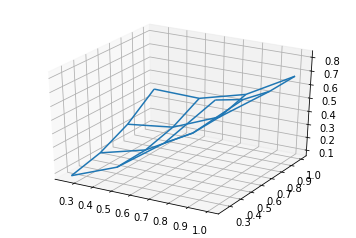

In [28]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx.flatten()[freenode].reshape(nx-1,ny-1), vy.flatten()[freenode].reshape(nx-1,ny-1), sol.reshape(nx-1,ny-1),rstride=1,cstride=1)

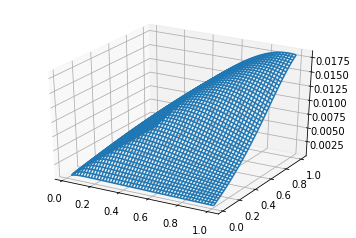

In [8]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx.flatten()[freenode].reshape(nx-1,ny-1), vy.flatten()[freenode].reshape(nx-1,ny-1), solerr.reshape(nx-1,ny-1),rstride=1,cstride=1)

In [9]:
er=np.matmul(A,sol)-vx.reshape(nx*ny,1)
ve=er.reshape(ny,nx)

ValueError: shapes (2500,2500) and (2401,1) not aligned: 2500 (dim 1) != 2401 (dim 0)

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(vx, vy, ve)

In [ ]:
%matplotlib inline
plt.plot(vx.reshape(nx*ny,1)[bndnode],u[bndnode])

In [ ]:
Abx=np.eye(nx,nx*ny)
Aby=np.zeros((ny-1,nx*ny))
Aby[range(ny-1),bndynode]=1
Ab=np.vstack((Abx,Aby,A))

fb=np.vstack((u[bndxnode],u[bndynode],f))
sol2=np.linalg.lstsq(Ab,fb)
vs2=sol2[0].reshape(ny,nx)

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, vs2,rstride=1,cstride=1)

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, vs2-(vx*vx-vx*vy+vy*vy/2),rstride=1,cstride=1)

In [ ]:
er2=np.matmul(A,sol2[0])-vx.reshape(nx*ny,1)
ve2=er2.reshape(ny,nx)

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(vx, vy, ve2)

In [29]:
A

array([[-10.,   5.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  -5.,   0.,   0.,   0.,  -5.,  1

In [33]:
(A[freenode][:,freenode])

array([[10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-5.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -5.,  0.,  0., -5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -5.,  0.,  0., -5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -5.,  0.,  0., -5., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -5.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -5.,  0.,  0., -5., 10.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -5.,  0.,  0., -5., 10.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.